This page compares all models for give dataset. It plots model's performance metrics to get a better understanding of the models.

In [28]:
import pandas as pd

# Load model evaluation data
df = pd.read_csv("data_models_docs.csv")

# Check for required columns
required_columns = ['model_name', 'mae', 'rmse', 'r2', 'inference_time_ms']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the data: {missing_columns}")

# df.head()


# Best Model based on individual metrics

#### MAE

Top 3 models based on MAE are:

In [29]:
# Sort by MAE and display the top 3 models
top_models_mae = df.nsmallest(3, 'mae')
top_models_mae[['model_name', 'mae', 'rmse', 'r2', 'inference_time_ms']]


,model_name,mae,rmse,r2,inference_time_ms
21,model_2D_002__250512_130315,0.019389,0.071470,0.997089,0.049695
19,model_2D_002__250512_125604,0.023970,0.073507,0.996920,0.063476
42,model_2D_002__250512_143306,0.027700,0.075287,0.996770,0.052714


Visualize MAE vs R²

C:\Users\ebben\AppData\Local\Temp\ipykernel_27908\4077285205.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


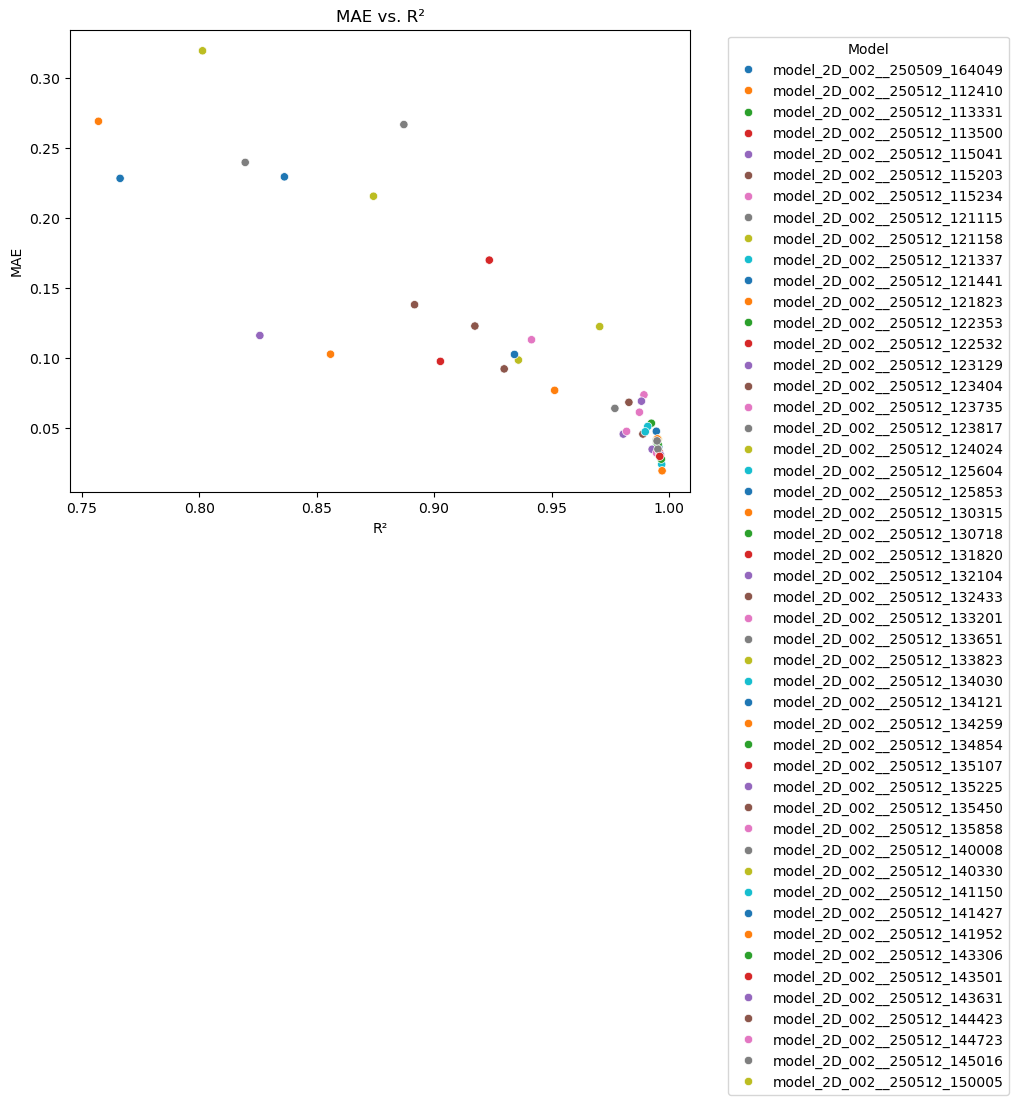

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='r2', y='mae', hue='model_name', palette='tab10')
plt.title('MAE vs. R²')
plt.xlabel('R²')
plt.ylabel('MAE')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Visualize MAE vs Inference Time

C:\Users\ebben\AppData\Local\Temp\ipykernel_27908\3509317830.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


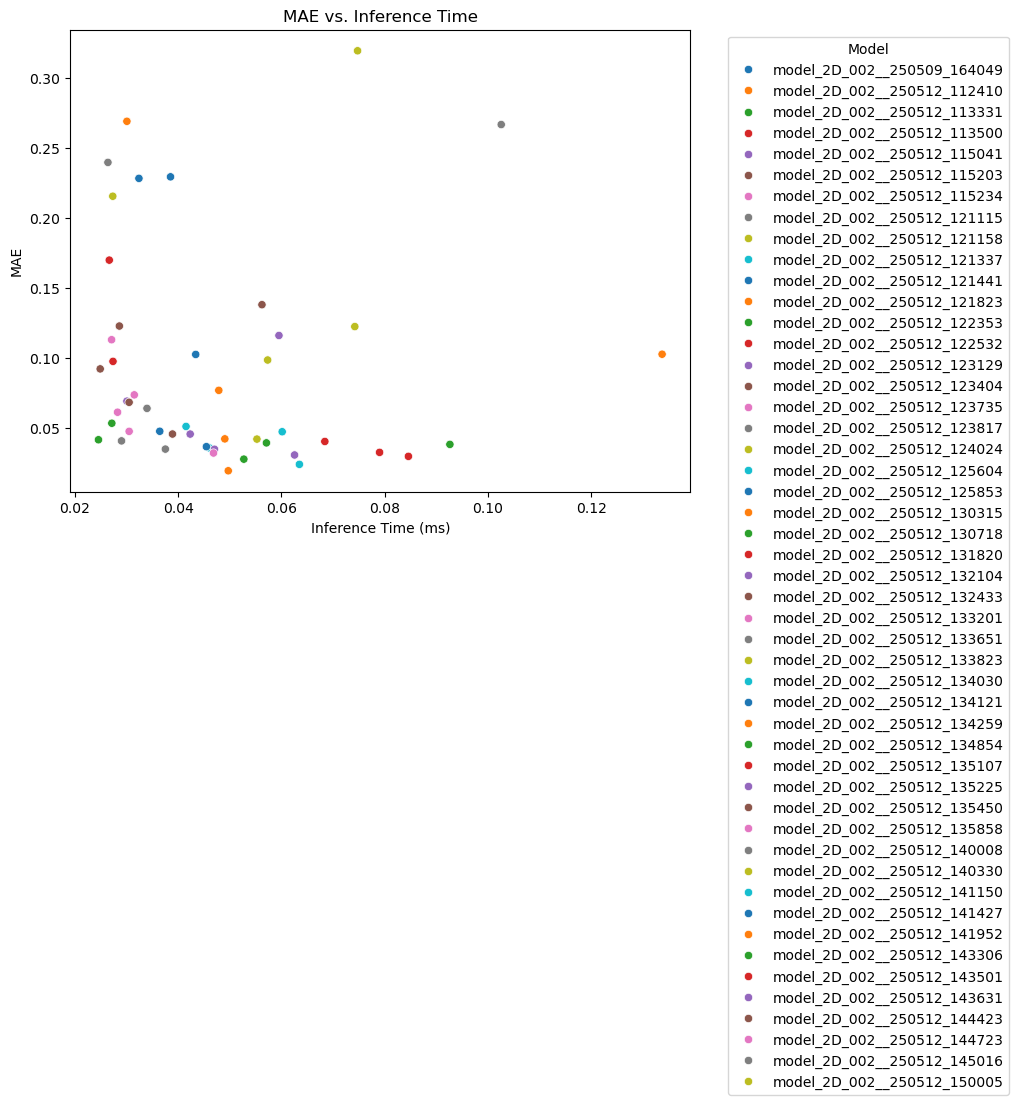

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='inference_time_ms', y='mae', hue='model_name', palette='tab10')
plt.title('MAE vs. Inference Time')
plt.xlabel('Inference Time (ms)')
plt.ylabel('MAE')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Correlation Analysis of Hyperparameters and Metrics

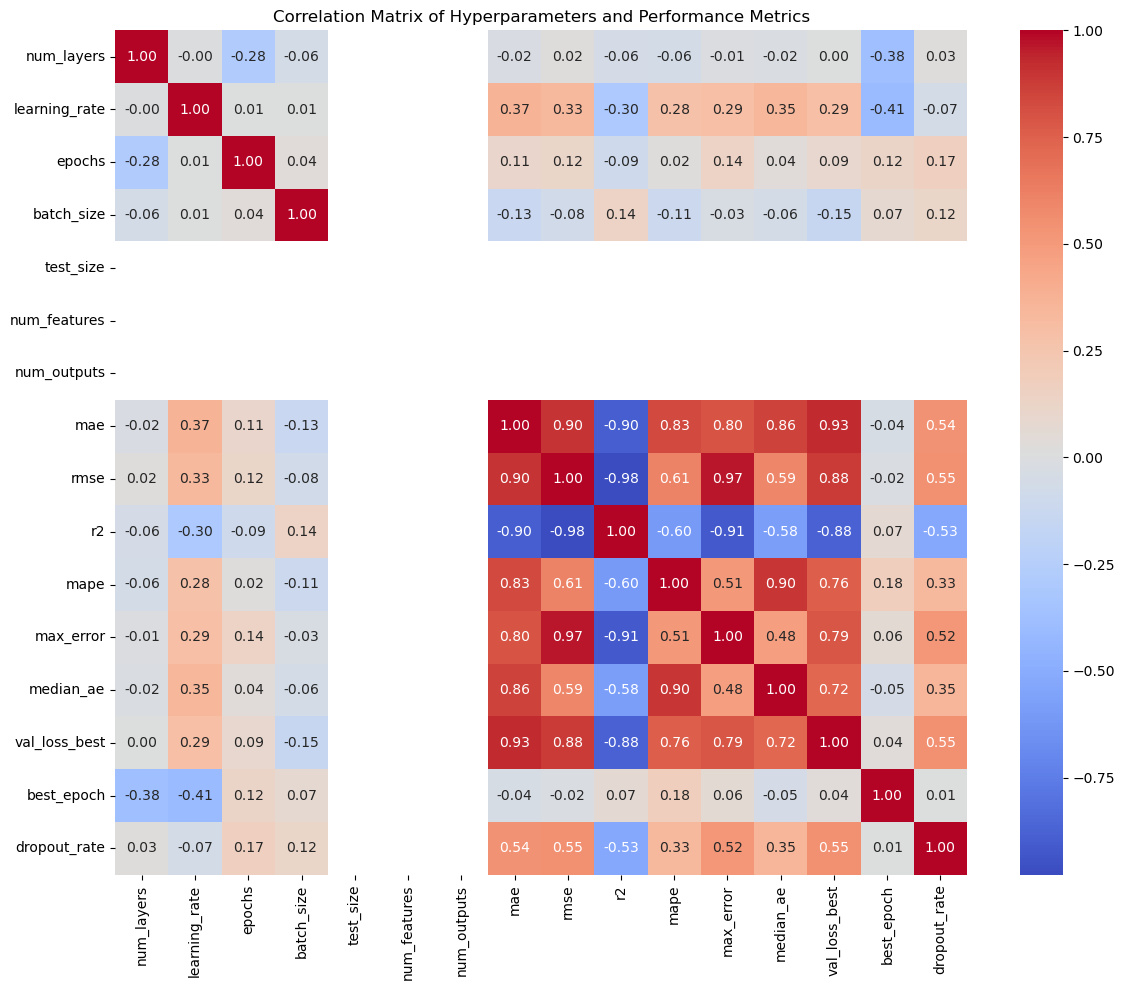

In [32]:
# Filter numeric columns and exclude irrelevant ones
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
exclude_cols = ['training_duration', 'inference_time_ms']
corr_cols = [col for col in numeric_cols if col not in exclude_cols]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Hyperparameters and Performance Metrics')
plt.tight_layout()
plt.show()


#### RMSE

#### R2